### Importing Packages

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Q4

In [163]:
#Importing and previewing the CSV 
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [164]:
#Finding # rows/columns and data types
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


# Answer: 
4 columns, 7662 rows. Data types are object, int64, and float64.

# Q6
Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [165]:
gdp = gdp_df.drop(columns=['Value Footnotes']).rename(columns={'Country or Area':'Country', 'Value':'GDP_Per_Capita'})
gdp.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


# Q7
How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [186]:
#Finding number of years in dataset
max_years = num_years['Num_Years'].max()

33

In [167]:
#Count of years for each country

#Creating series that counts # unique years for each country, turning the series into a DataFrame and naming columns
num_years = gdp.groupby('Country')['Year'].count().to_frame().rename(columns={'Year':'Num_Years'})

#Should I be setting index to column?

In [187]:
#Number of countries with data for all years

#Subsetting to find countries with 33 unique years of data
num_years[num_years['Num_Years'] == max_years]

,Num_Years
Country,
Africa Eastern and Southern,33
Africa Western and Central,33
Albania,33
Algeria,33
Angola,33
...,...
Vanuatu,33
Viet Nam,33
World,33


In [188]:
#Countries with missing years, sorted with most missing data at the top

#Subsetting to find countries with missing years (<33), and sorting to view most missing data at the top
missing = num_years[num_years['Num_Years'] < max_years].sort_values('Num_Years')
missing.head(10)

,Num_Years
Country,
Djibouti,10
Somalia,10
Turks and Caicos Islands,12
Sint Maarten (Dutch part),14
Kosovo,15
Cayman Islands,16
Nauru,19
Afghanistan,20
CuraÃ§ao,22


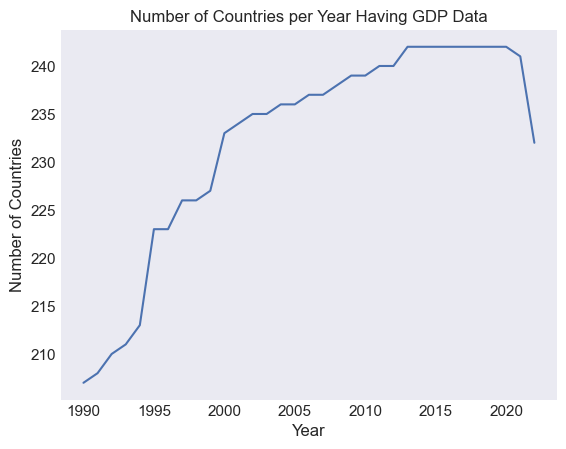

In [170]:
#Number of observations per year

#Creating series, turning into DataFrame, and renaming columns
years = gdp.groupby('Year')['Country'].count().to_frame().rename(columns={'Country':'Num_Countries'})

#Plotting
plt.style.use('seaborn-v0_8-dark')
plt.plot(years.index, years.Num_Countries)
plt.title('Number of Countries per Year Having GDP Data')
plt.ylabel('Number of Countries')
plt.xlabel('Year')
plt.show()

# Answer:
Countries with data for all 33 years: 202

Countries missing many years of data: Djibouti and Somalia are missing the most years

See plot for # observations per year

# Q8
In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [171]:
#Subsetting to 2020 data
gdp2020 = gdp[gdp['Year'] == 2020]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


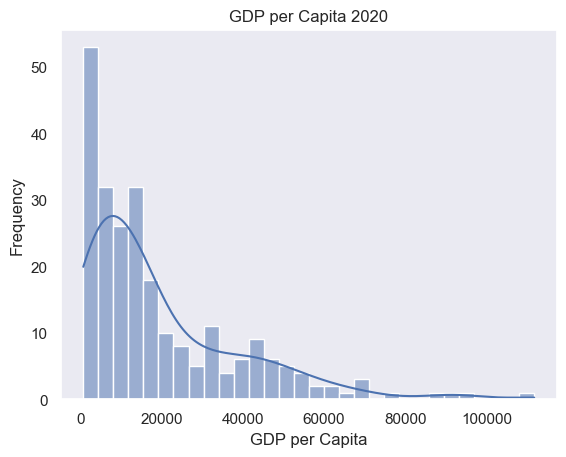

In [172]:
#Histogram
sns.set_theme(style='dark')

sns.histplot(data=gdp2020, x='GDP_Per_Capita', bins=30, kde=True).set(title='GDP per Capita 2020', xlabel='GDP per Capita', ylabel='Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


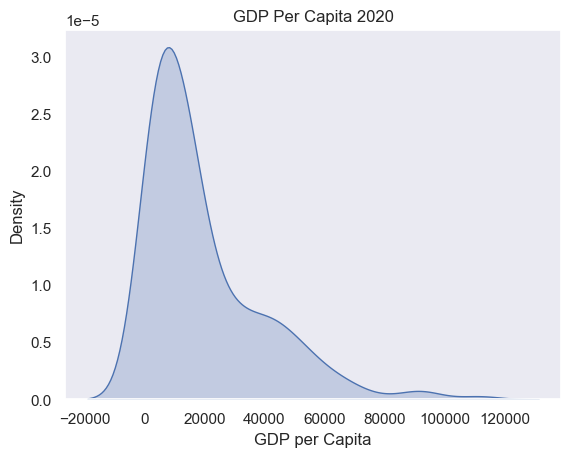

In [173]:
#Density Plot
sns.kdeplot(gdp2020['GDP_Per_Capita'], fill=True).set(title='GDP Per Capita 2020', xlabel='GDP per Capita', ylabel='Density')
plt.show()

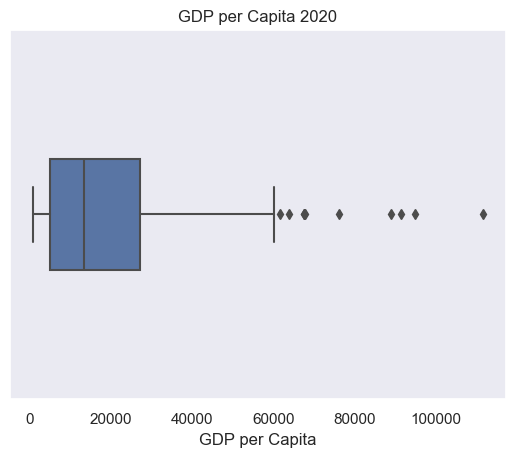

In [174]:
#Boxplot
sns.boxplot(x=gdp2020['GDP_Per_Capita'], width=0.3).set(title='GDP per Capita 2020', xlabel='GDP per Capita')
plt.show()

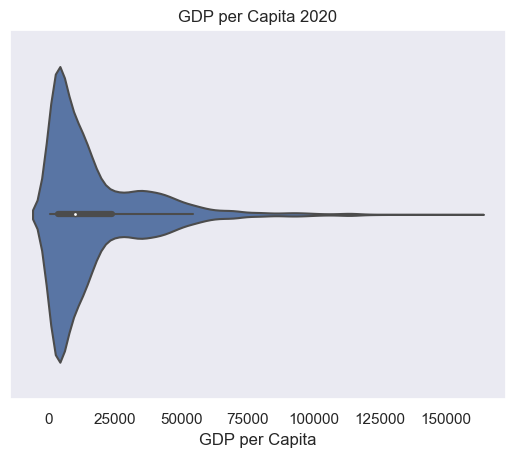

In [175]:
#Violin Plot
sns.violinplot(x=gdp['GDP_Per_Capita']).set(title='GDP per Capita 2020', xlabel='GDP per Capita')
plt.show()

# Answer:
Histograms and density plots show the distribution shapes, while boxplots and violin plots show information about central tendency, variability, and outliers within the distribution. Violin are a great middle ground, combining the detailed distribution shape of density plots with the summary statistics of boxplots.

# Q9
What was the median GDP per capita value in 2020?

In [176]:
gdp2020['GDP_Per_Capita'].median()

13357.997573370474

# Answer:
$13,357.99

# Q10
For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

- A boxplot
- A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
- A scatterplot
- A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)

Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [179]:
#Subsetting the data
gdp_decades = gdp[gdp['Year'].isin([1990, 2000, 2010, 2020])]

#Setting the theme
sns.set_theme(style='dark')

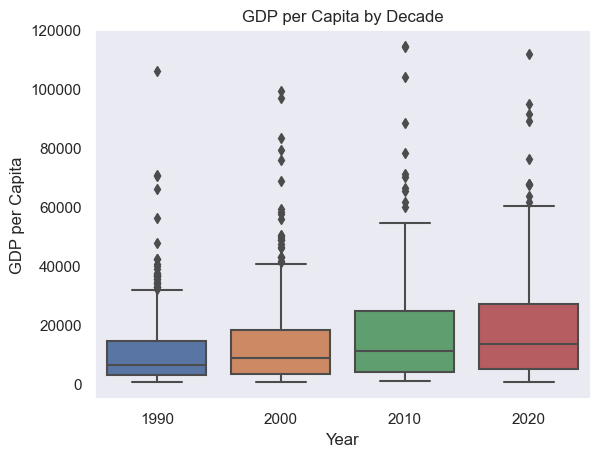

In [181]:
#Boxplot
sns.boxplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita']).set(title='GDP per Capita by Decade', xlabel='Year', ylabel='GDP per Capita')
plt.show()

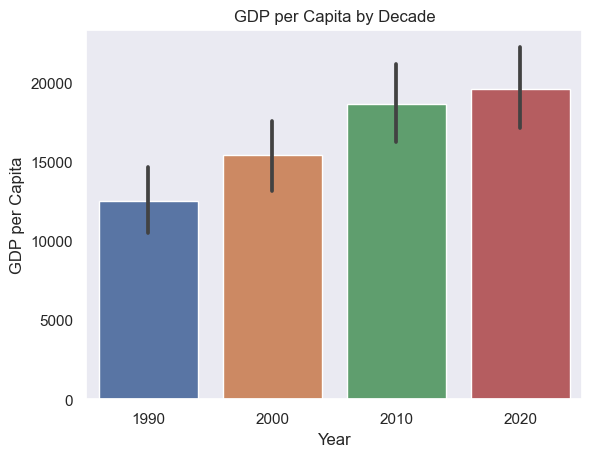

In [182]:
#Barplot
sns.barplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita']).set(title='GDP per Capita by Decade', xlabel='Year', ylabel='GDP per Capita')
plt.show()

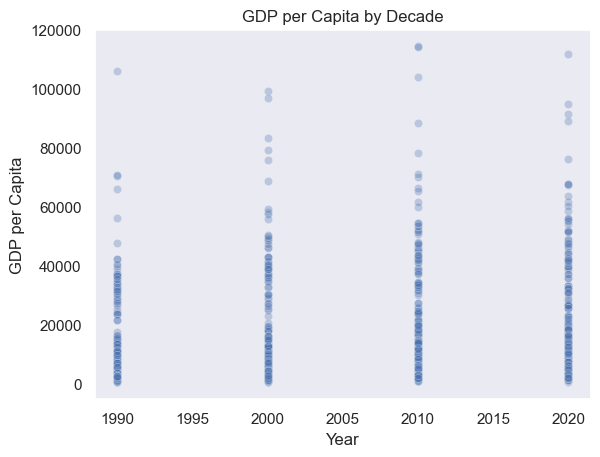

In [183]:
#Scatterplot
sns.scatterplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], alpha=.3).set(title='GDP per Capita by Decade', xlabel='Year', ylabel='GDP per Capita')
plt.show()

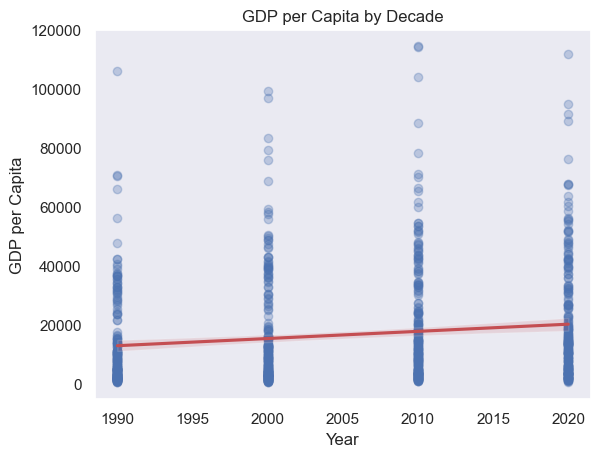

In [184]:
#Scatterplot with trendline
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], scatter_kws={"alpha": 0.3}, line_kws={"color": "r"}).set(title='GDP per Capita by Decade', xlabel='Year', ylabel='GDP per Capita')
plt.show()

# Answer:
GDP is increasing over time.
Boxplot: Highlights key summary statistics like median, IQR, quartiles, and outliers, so it is useful for comparing distributions. However, it may oversimplify data and hide finer details - for example it doesn't show individual data points.
Barplot: Effectively shows differences across categories but not ideal for visualizing trends over time, better for categorical data. It also does not show much in the way of summary statistics.
Scatterplot: Great for exploring relationships between two numerical variables but less suitable for displaying trends over time, especially when time is treated as a numeric variable. The trendline is helpful but this is still not the correct type of plot for the data.

# Q11
Which country was the first to have a GDP per capita greater than $100,000?

In [194]:
#Subsetting for >100k
gdp_100k = gdp[gdp['GDP_Per_Capita'] > 100000]

#Sorting by year ascending and viewing the first row
gdp_100k.sort_values('Year').head(1)

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


# Q12
Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

# Q13
Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?